In [110]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Поиск директории с файлом

##### Функция поднятия на n-ое количество ступений выше в директории

In [7]:
def find_parent_directory(path, level=1):
    upper_directory_path = path
    for i in range(level):
        upper_directory_path = os.path.dirname(upper_directory_path)
    return upper_directory_path

In [23]:
current_path = os.getcwd()
current_path

'/home/jupyter-d-barkov/Homework/lesson_4'

In [28]:
path_to_file = f"{find_parent_directory(current_path)}/lesson_3/3_taxi_peru.csv"
path_to_file

'/home/jupyter-d-barkov/Homework/lesson_3/3_taxi_peru.csv'

### Загрузка датафрейма

In [42]:
taxi = pd.read_csv(path_to_file, encoding='utf-8', sep=';', parse_dates=['arrived_at', 'end_at', 'start_at'])

##### Проверим типы данных

In [44]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

### Создадим колонку "wait_time", как разницу между временем заказа и пребытия такси. Преведем ее тип ко временному.

In [45]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [46]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0


### 1 способ. 
### Произведем отбор тех водителей, чей статус заказа был - "reserved" и время ожидания превысело 0.0.
##### Произведем сортировку по убыванию.

In [87]:
late_reserved_taxi = taxi \
                          .query("start_type == 'reserved' and wait_time > 0.0") \
                          .groupby('driver_id') \
                          .agg({'start_type': 'count'}) \
                          .rename(columns={'start_type': 'number_of_lates'}) \
                          .sort_values('number_of_lates', ascending=False)

In [85]:
late_reserved_taxi

,driver_id,number_of_lates
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


##### Определим водителя с наибольшим количеством опозданий:

In [80]:
top_later_driver = late_reserved_taxi.head(1)['driver_id'] # работает при as_index=False

In [82]:
top_later_driver

24    406921adcca37705ef527b4246c0cfea
Name: driver_id, dtype: object

In [88]:
max_later_driver = late_reserved_taxi.idxmax() # работает при as_index=True

In [89]:
max_later_driver

number_of_lates    406921adcca37705ef527b4246c0cfea
dtype: object

### 2 способ. 
### Произведем отбор тех водителей, чей статус заказа был - "reserved" и время ожидания превысело 0.0.
##### Выберем водителя с наибольшим количеством опозданий с помощью подсчета распределения id-шников (driver_id) - value_counts().

In [93]:
late_reserved_taxi_2 = taxi \
                          .query("start_type == 'reserved' and wait_time > 0.0") \
                          .driver_id \
                          .value_counts()

In [94]:
late_reserved_taxi_2

406921adcca37705ef527b4246c0cfea    67
d665fb9f75ef5d9cd0fd89479380ba78    59
ec84a73745199ff840ecafcb924383ad    57
56f59b58bcbbd1cdabc3652e713134c2    51
c814db2127582cf95dea1f74f43127c2    45
                                    ..
86981d5cc39076d9d0281221fe19f3fa     1
358741ec2409c505c4545c38669b000b     1
4851ee4c867c9b49b909c1adb76c31e9     1
36c09cf37ce9cd241ffd160d17d6bcf9     1
b5821eaaa5d49fb2936ff5b0ffa34a35     1
Name: driver_id, Length: 105, dtype: int64

In [95]:
max_later_driver_2 = late_reserved_taxi_2.idxmax()

In [96]:
max_later_driver_2

'406921adcca37705ef527b4246c0cfea'

### Создадим столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at), и столбец weekday – название дня недели. 

In [105]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

In [106]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,...,drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0,7,Saturday
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,...,drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0,10,Saturday
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,...,drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0,9,Tuesday
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,...,drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0,4,Thursday


### Построим график числа заказов по месяцам (month).

In [107]:
order_by_month = taxi.month.value_counts()

In [108]:
order_by_month

12    3313
10    3240
11    3021
9     2598
8     2120
6     1939
5     1585
7     1516
4     1448
3      986
2      770
1      575
Name: month, dtype: int64

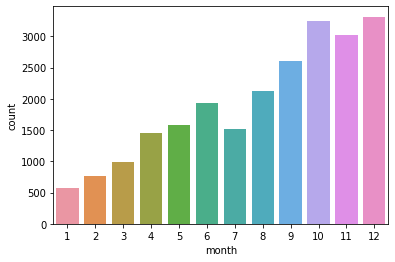

In [111]:
sns.countplot(x=taxi['month'])

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


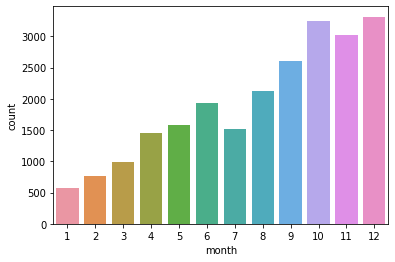

In [112]:
sns.countplot(taxi.month)

### Построим график числа заказов по дням (day).

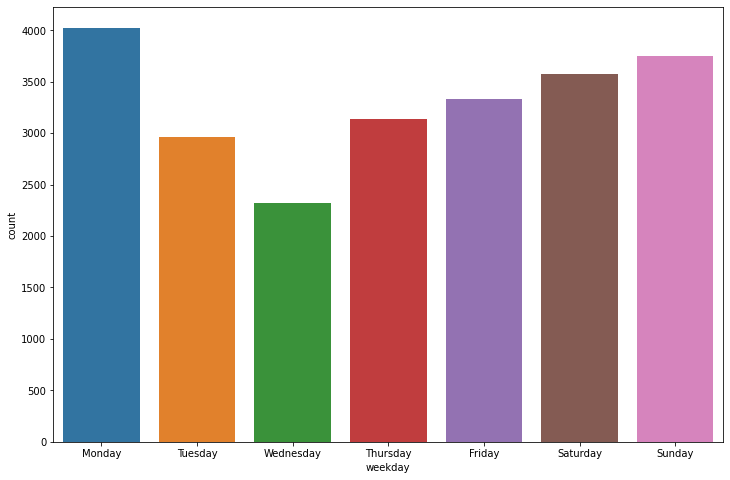

In [199]:
plt.figure(figsize=(12, 8))
sns.countplot(x=taxi.weekday, order=weekday_list)

#### Создаю упорядоченный список дней недели чтобы передать его в countplot

##### Неудачная попытка с unique()

In [201]:
weekday_array = taxi.weekday.unique()
weekday_list = [i for i in weekday_array]

In [123]:
weekday_list

['Tuesday', 'Monday', 'Saturday', 'Sunday', 'Friday', 'Wednesday', 'Thursday']

##### Удачная попытка с drop_duplicates()

In [189]:
part_df = taxi[['weekday', 'start_at']]
part_df.dtypes

weekday             object
start_at    datetime64[ns]
dtype: object

In [191]:
part_df['start_at'] = part_df.start_at.dt.weekday

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
part_df

,weekday,start_at
0,Tuesday,1
1,Tuesday,1
2,Monday,0
3,Tuesday,1
4,Saturday,5
...,...,...
23106,Saturday,5
23107,Saturday,5
23108,Tuesday,1
23109,Thursday,3


In [195]:
part_df = part_df.drop_duplicates(subset='weekday').sort_values('start_at')

In [196]:
part_df

,weekday,start_at
2,Monday,0
0,Tuesday,1
16,Wednesday,2
17,Thursday,3
8,Friday,4
4,Saturday,5
6,Sunday,6


In [197]:
weekday_list = [i for i in part_df.weekday]

In [198]:
weekday_list

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

### Посчитаем метрики: DAU (daily active users), WAU (weekly active users), MAU (monthly active users)

#### *Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.

In [229]:
taxi.groupby(['weekday', 'user_id'], as_index=False) \
    .agg({'taxi_id': 'count'}) \
    .rename(columns={'taxi_id': 'order_numbers'}) \
    .query("order_numbers > 0") \
#     .agg({'user_id': pd.Series.nunique})

,weekday,user_id,order_numbers
0,Friday,00cb8ad6a0f7214d002e3ded6b7c9b80,1
1,Friday,00cb8ad6a0f7214d002e3ded6b7de012,3
2,Friday,0221e01fd79a9e76808595048df20efd,4
3,Friday,0234eb5f7e99d581c72052f0a869293a,1
4,Friday,0234eb5f7e99d581c72052f0a86abaee,1
...,...,...,...
4159,Wednesday,fdd0e7184d1ec5e7cba69b61ee4be622,1
4160,Wednesday,fdf02c2d7b2dd9c0c7eb0b0b729c57ca,1
4161,Wednesday,feceb9ec89bf76685af19ab5f8659b84,5
4162,Wednesday,ff1cb10b9edf79369742a37ce5d5f898,3


####  DAU (daily active users)

In [246]:
DAU = taxi.groupby('weekday', as_index=False) \
          .agg({'user_id': pd.Series.nunique}) \
          .rename(columns={'user_id': 'unique_users_number'}) \
          .sort_values('unique_users_number')
DAU

,weekday,unique_users_number
0,Friday,528
4,Thursday,538
2,Saturday,557
6,Wednesday,579
3,Sunday,615
1,Monday,667
5,Tuesday,680


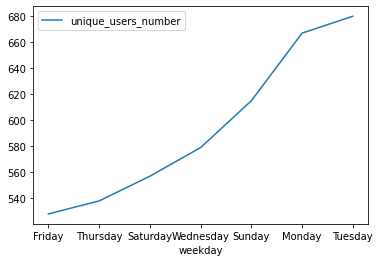

In [250]:
DAU.plot.line(x='weekday')


####  MAU (monthly active users)

In [251]:
MAU = taxi.groupby('month', as_index=False) \
          .agg({'user_id': pd.Series.nunique}) \
          .rename(columns={'user_id': 'unique_users_number'}) \
          .sort_values('unique_users_number')

MAU

,month,unique_users_number
0,1,102
1,2,111
2,3,163
3,4,254
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


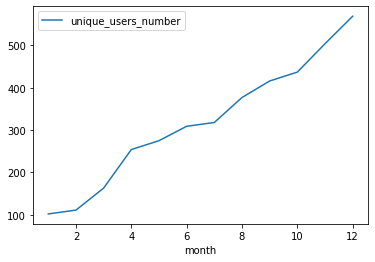

In [252]:
MAU.plot.line(x='month')